### 多项式回归

In [31]:
# 解决非线性回归问题
import numpy as np
import matplotlib.pyplot as plt

In [32]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)

In [33]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)
y.shape

(100,)

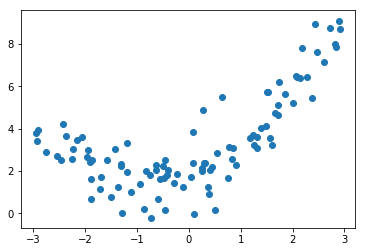

In [34]:
plt.scatter(x, y)
plt.show()

In [35]:
# 先用线性回归拟合一下，看下效果
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_predict = lin_reg.predict(X)

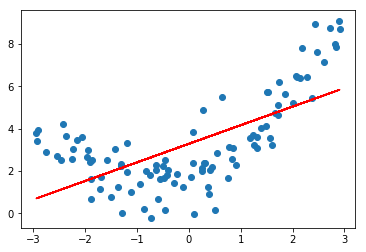

In [37]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()

#### 添加一个特征

In [38]:
(X**2).shape

(100, 1)

In [41]:
# 添加一个X**2的特征，自己伪造的特征。
# 可以看成是x1是X，x2是X**2
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [43]:
lin_reg2 = LinearRegression()
# 
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

1.4854884979948535
4.110992793720016


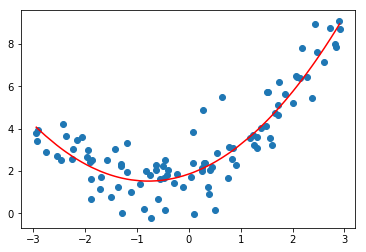

In [57]:
plt.scatter(x,y)
# 画出排序后的x的曲线0
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [69]:
# 可以看到求得的系数也是拟合的
lin_reg2.coef_

array([0.85132375, 0.54577166])

In [70]:
# 截距 也是差不多的
lin_reg2.intercept_

1.8599273447296065

In [71]:
# 从上面的例子看出，多项式回归其实也是基于线性回归，不过是添加了一些x**2的特征，然后当成线性回归去训练。

#### sklearn 中的多项式回归和pipeline

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

In [74]:
# 添加一些特征
from sklearn.preprocessing import PolynomialFeatures

In [75]:
# degree 最高添加几次幂的特征
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [76]:
X2.shape

(100, 3)

In [77]:
# 打印二维数组的前5行，[:5] 表示0-5行，列方向是所有列
X2[:5,:]
# 第一列是x^0， 第三列是x^2

array([[ 1.        ,  0.52908789,  0.27993399],
       [ 1.        , -1.60360986,  2.57156458],
       [ 1.        ,  0.49570479,  0.24572324],
       [ 1.        , -2.95057935,  8.70591847],
       [ 1.        , -1.14149076,  1.30300116]])

In [78]:
# 原来的X
X[:5]

array([[ 0.52908789],
       [-1.60360986],
       [ 0.49570479],
       [-2.95057935],
       [-1.14149076]])

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)
y_prediction2 = lin_reg2.predict(X2)

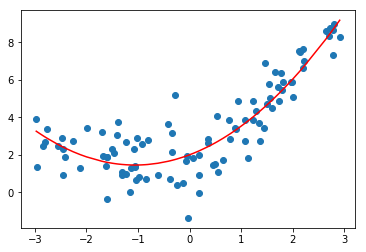

In [80]:
plt.scatter(x,y)
# 画出排序后的x的曲线0
plt.plot(np.sort(x),y_prediction2[np.argsort(x)],color='r')
plt.show()

In [81]:
lin_reg2.coef_
# 0的意思是x^0的系数

array([0.        , 1.03574454, 0.49099122])

In [82]:
# 截距
lin_reg2.intercept_

1.9939837102873774

#### 关于PolynomialFeatures

In [83]:
X = np.arange(1,11).reshape(-1,2)

In [84]:
X.shape

(5, 2)

In [85]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [86]:
X2.shape

(5, 6)

In [87]:
X2
# 原来是x1,x2,那么poly之后就是x1^2，x2^2,x1*x2
# 所有可能的二次项

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

#### pipeline

In [88]:
# 使用pipeline更容易使用多项式回归

In [89]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Pipeline 接收一个list，list中的tuple依次表示操作步骤,自动识别参数
poly_reg = Pipeline([("poly", PolynomialFeatures(degree=2)),("std_scaler", StandardScaler()), ("lin_reg", LinearRegression())])

In [93]:
# 直接识别
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

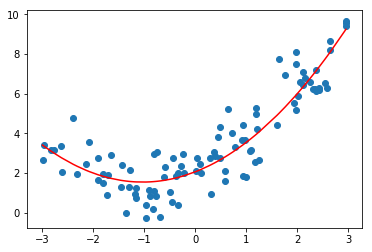

In [94]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

### 过拟合和欠拟合

In [97]:
import numpy as np 
import matplotlib.pyplot as plt

In [98]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

#### 使用线性回归

In [101]:
# 先用线性回归拟合一下，看下效果
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)
# 可以看出线性回归得到的R方值太低了，所以使用线性回归可能不太合适

0.4424175486783395

In [102]:
# 使用均方误差衡量模型，其实用r方值score也是一样的
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

3.1211248970031233

#### 使用多项式回归

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    # Pipeline 接收一个list，list中的tuple依次表示操作步骤,自动识别参数
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())])

In [114]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [115]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y,y2_predict)
# 使用多项式回归之后的均方差已经降低到1了

1.0030079135245287

In [116]:
# degree = 10 呢？

In [121]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y,y10_predict)

0.9514090020395928

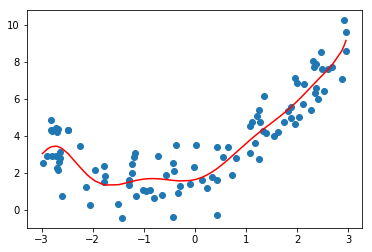

In [124]:
plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color='r')
plt.show()

In [125]:
# degre = 100
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y,y100_predict)

0.4872058290104589

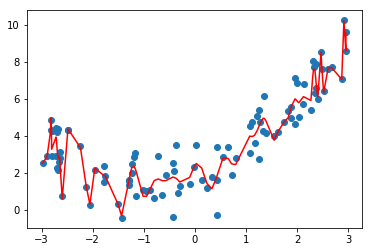

In [126]:
plt.scatter(x,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color='r')
plt.show()

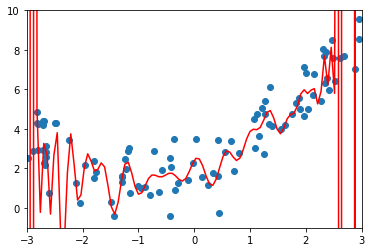

In [131]:
# 还原原来的曲线，上面的曲线两个点之间间隔太大
# -3到3均匀取值
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0], y_plot, color='r')
# 限定坐标轴
plt.axis([-3,3,-1,10])
plt.show()

In [133]:
# 简单推断，degree越大，拟合越好，均方误差越小。
# 但是这个曲线是我们真正想要的吗？显然并不是这样，这就是过拟合。 ML主要解决过拟合问题
# 反过来，使用线性回归拟合的话，就是欠拟合。

### 模型的泛化能力

In [134]:
# 过拟合的问题主要在于拟合的模型只是在原有的样本上拟合的很好，总体均方差误差小，但是对于一个新来的样本，可能预测结果会相差甚远。
# 这种情况就叫模型的泛化能力，也就是说训练的模型对于新数据的预测能力很差。
# 所以ML的目的是预测新数据，而不是预测训练的样本。

# 怎么解决这个问题？
# 训练集和测试分开
# 如果针对测试数据也能能好的预测，那我们训练的模型的泛化能力就好

In [136]:
# 看看测试集的预测能力
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [137]:
lin_reg = LinearRegression()
# 使用训练集得到模型
lin_reg.fit(X_train,y_train)
# 使用测试集得到预测值
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

3.9005115872988494

In [139]:
# 使用多项式回归
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train,y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)
# 2维拟合的均方差为0.99

0.9943428290627588

In [141]:
# 使用多项式回归
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train,y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)
# 10维拟合的均方差为1.15  ,虽然对于训练集的mse变好了，但是泛化能力（测试集的mse）变差了

1.1559600131787733

In [143]:
# 使用多项式回归
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train,y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y100_predict)
# 100维拟合的均方差为2.3  泛化能力更差

2.3036940623104725

#### 模型复杂度

In [144]:
# 对于训练数据集来说，模型越复杂，那么准确率越高
# 对于测试数据集来说，模型越复杂，预测准确率反而下降

# 欠拟合： 算法所训练的模型不能表达数据间的关系。
# 过拟合：算法所训练的模型过多的表达了数据间的关系。 将噪声也学习进去了


# ☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆☆   机器学习的重点就是解决过拟合。。。。

### 学习曲线

In [145]:
# 看到模型对数据的过拟合和欠拟合

In [153]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
# 虚拟测试数据
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

# 分隔训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [154]:
X_train.shape

(75, 1)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_mse = []
test_mse = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_mse.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_test_predict))

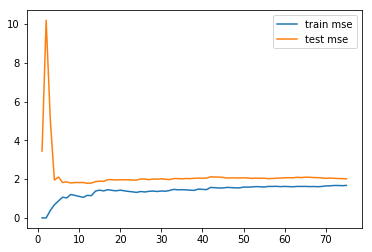

In [158]:
# 绘制两个mse的变化,这里去对均方差误差开根号
plt.plot([i for i in range(1, 76)], np.sqrt(train_mse), label= "train mse")
plt.plot([i for i in range(1, 76)], np.sqrt(test_mse), label= "test mse")
plt.legend()
# plt.axis([1,76,0,4])
plt.show()

In [159]:
# 从上图看出，训练数据集上，训练误差越来越高了，因为训练数据越多，越难拟合所有数据，但是也会最终趋于一个稳定值。
# 测试集上的预测误差越来越小，也就是说当训练样本越来越多时，预测误差越来越小了，模型的泛化能力有提升
# 在最终，测试误差和训练误差趋于相等，不过测试误差还是高于训练误差一些，这是因为，训练数据在数据非常多的情况下，
# 可以将数据拟合的比较好，误差小一些，但是泛化到测试数据集的时候，还是有可能多一些误差

In [160]:
# 可以封装上述学习曲线

In [1]:
def plot_learning_curve(algo, X_train, X_test,y_train,y_test):
    train_mse = []
    test_mse = []
    for i in range(1, len(X_train)+1):
        
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_mse.append(mean_squared_error(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_mse.append(mean_squared_error(y_test, y_test_predict))

        # 绘制两个mse的变化,这里去对均方差误差开根号
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_mse), label= "train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_mse), label= "test")
    plt.legend()
    plt.axis([1,len(X_train)+1,0,4])
    plt.show()
plot_learning_curve(LinearRegression(), X_train, X_test,y_train,y_test)
# 实际上是欠拟合

NameError: name 'LinearRegression' is not defined

#### 多项式回归学习曲线

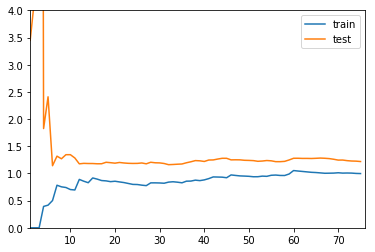

In [162]:
# 使用2维多项式拟合
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test,y_train,y_test)

In [163]:
# 趋势跟线性回归趋势差不多。但是稳定的位置要比线性回归稳定的位置低。说明多项式回归要比线性回归好
# 实际上是正合适

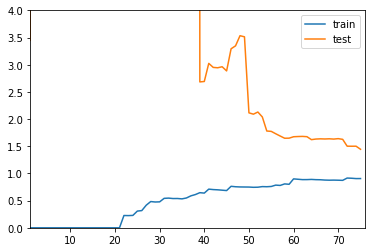

In [164]:
# 看看20维
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test,y_train,y_test)

In [165]:
# 在使用20阶多项式回归训练模型的时候可以发现，在数据量偏多的时候，我们的训练数据集拟合的是比较好的，
# 但是测试数据集的误差相对来说增大了很多，离训练数据集比较远，通常这就是过拟合的结果，他的泛化能力是不够的
# 过拟合

#### 测试数据集的意义

In [166]:
# 对于训练集上得到的模型如果发生了过拟合而不知，如果直接用于生产环境，效果肯定不行。
# 通过测试数据集来判断模型好坏，泛化能力是否好。

In [168]:
# 但是也有一定的问题？
# 我们的调参是否是根据测试数据集来进行了，也就是说我们
# 是围绕了测试数据集来评判模型，得到的估计还是满足这一部分测试集的参数。

# 解决的思路是，将数据集分成三部分，训练集、测试集、验证集

In [169]:
# 我们使用训练数据集训练好模型之后，将验证数据集送给这个模型，看看这个训练数据集训练的效果是怎么样的，
# 如果效果不好的话，我们重新换参数，重新训练模型。直到我们的模型针对验证数据来说已经达到最优了。

# 这样我们的模型达到最优以后，再讲测试数据集送给模型，这样才能作为衡量模型最终的性能。
# 换句话说，
# 我们的测试数据集是不参与模型的创建的，而其他两个数据集都参与了训练。
# 但是我们的测试数据集对于模型是完全不可知的，
# 相当于我们在模型这个模型完全不知道的数据

In [170]:
# 这种方法还会有一个问题。

# 由于我们的模型可能会针对验证数据集过拟合，
# 而我们只有一份验证数据集，一旦我们的数据集里有比较极端的情况，
# 那么模型的性能就会下降很多，那么为了解决这个问题，就有了交叉验证。

#### 交叉验证

In [171]:
# 交叉验证相对来说是比较正规的、比较标准的在我们调整我们的模型参数的时候看我们的性能的方式

# 交叉验证：在训练模型的时候，通常把训练数据平分成k份，例如分成3份（ABC）（分成k分，k属于超参数），
# 这三份分别作为验证数据集和训练数据集。这样组合后可以分别产生三个模型，这三个模型，
# 每个模型在测试数据集上都会产生一个性能的指标，
# 这三个指标的平均值作为当前这个算法训练处的模型衡量的标准。

# 由于我们有一个求平均的过程，所以不会由于一份验证数据集中有比较极端的数据而导致模型有过大的偏差，
# 这比我们只分成训练、验证、测试数据集要更加准确

<img src="./图片/交叉验证.jpg">

In [173]:
# 实现交叉验证

In [174]:
import numpy as np
from sklearn import datasets

In [175]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state =666)

In [179]:
# 利用knn算法
from sklearn.neighbors import KNeighborsClassifier
best_score, best_p, best_k = 0, 0, 0
for k in range(2,11):
    # k 是邻近
    for p in range(1,5):
        # p是距离
        knn = KNeighborsClassifier(weights='distance',n_neighbors=k,p=p)
        knn.fit(X_train,y_train)
        score = knn.score(X_test,y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("best_score", best_score)
print("best_p", best_p)
print("best_k", best_k)

best_score 0.9860917941585535
best_p 4
best_k 3


In [180]:
# 使用交叉验证

In [183]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train)
# 返回一个数组，默认将训练集分成三份进行交叉验证，返回得到的结果。

array([0.98895028, 0.97777778, 0.96629213])

In [184]:
# 使用交叉验证调参
from sklearn.neighbors import KNeighborsClassifier
best_score, best_p, best_k = 0, 0, 0
for k in range(2,11):
    # k 是邻近
    for p in range(1,5):
        # p是距离
        knn = KNeighborsClassifier(weights='distance',n_neighbors=k,p=p)
        knn.fit(X_train,y_train)
        # 使用交叉验证得到score
        scores = cross_val_score(knn,X_train,y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("best_score", best_score)
print("best_p", best_p)
print("best_k", best_k)

best_score 0.9823599874006478
best_p 2
best_k 2


In [185]:
# 做交叉验证不是要拿到best_score而是best_k和best_p参数组合
knn = KNeighborsClassifier(weights='distance',n_neighbors=2,p=2)
# 此时的X_test完全没有参与训练过程，这个结果还是可信的。
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.980528511821975

In [186]:
# 回顾网格搜索
# GridSearchCV里的cv实际上就是交叉验证的方式
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"weights":['distance'],
     "n_neighbors":[i for i in range(2,10)],
     "p":[i for i in range(1,6)]
    }]
knn = KNeighborsClassifier()

# cv默认为3，可以修改改参数，修改修改不同分数的数据集
grid_search = GridSearchCV(knn, param_grid,verbose=1,cv=3)
grid_search.fit(X_train,y_train)

# 参数组合 8 * 5 * 3 = 120次训练

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [189]:
grid_search.best_score_

0.9823747680890538

In [190]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [191]:
# 总结：


# 虽然整体速度慢了，但是这个结果却是可信赖的
# 极端情况下，K-folds cross validation可以叫做留一法LOO -CV（学术研究中）

### 偏差方差权衡

<img src="./图片/偏差和方差.png">

In [192]:
# 模型误差=偏差（Bias）均差(Variance)+不可避免的误差

In [193]:
# 不可避免的误差是无能为力的，系统误差或者数据采集误差

In [194]:
# 偏差还有可能是特征选取错误，比如预测学生成绩，选取学生的名字做特征，两者完全没有关系。

In [195]:
# 模型没有完全的学到数据的中心，而学习到了很多噪音。

<img src = "./图片/方差.png">

In [196]:
# 有一些算法天生是高方差算法。
# 如KNN（过于依赖数据，一点选取的数据点有多数是不正确的，那么预测的结果就是错误的。导致有的很准确，有的非常不准确，方差非常大）
# 非参数学习通常都是高方差的算法。因为不对数据做任何假设,比如决策树

In [197]:
# 有一些算法天生是高偏差算法。如线性回归（用一条直线去拟合一条曲线，导致整体预测结果都距离真实数据查很大，偏差非常大）
# 参数学习通常都是高偏差的算法。因为对数据具有极强的假设
# 但是如果假设错误，就导致了高偏差

In [198]:
# 大多数算法具有相应的参数，可以调整偏差和方差
# 如KNN中的k
"""
k越小，模型越复杂，方差越大，偏差越小
k越大，模型越简单，方差越小，偏差越大
"""

# 线性回归中使用多项式回归 degree
"""
degree越小，模型越简单，方差越小，偏差越大
degree越大，模型越复杂，方差越大，偏差越小
"""
# 偏差和方差是互相矛盾的。降低方差会提高偏差，降低偏差会提高方差

'\ndegree越小，模型越简单，方差越小，偏差越大\ndegree越大，模型越复杂，方差越大，偏差越小\n'

In [199]:
# 机器学习的主要调整来源于方差（这是站在算法的角度上，而不是问题的角度上,比如对金融市场的理解，
# 很多人尝试用历史的数据预测未来的金融走势，这样的尝试通常都不太理想。
# 很有可能因为历史的金融趋势不能很好的反应未来的走向，这种预测方法本身带来的非常大的偏差） 特征选择错了，但通常情况下，假设特征选对了。

# 换句话说，我们很容易让模型变的很复杂，从而降低模型的偏差，但是由于这样的模型的方差非常的大，最终也没有很好的性能。

In [200]:
# 解决高方差的通常手段：
"""
1.降低模型复杂度
2.减少数据维度；降噪
3.增加样本数（模型太过复杂，模型中的参数非常多，而样本数不足以支撑计算出这么复杂的参数）  # 深度学习领域
4.使用验证集
5.模型正则化
"""


'\n1.降低模型复杂度\n2.减少数据维度；降噪\n3.增加样本数（模型太过复杂，模型中的参数非常多，而样本数不足以支撑计算出这么复杂的参数）  # 深度学习领域\n4.使用验证集\n5.模型正则化\n'

### 模型正则化

In [1]:
# 限制参数系数的大小

In [5]:
# 过拟合会导致某些系数非常大

<img src = "./图片/模型正则化.png">

In [7]:
# 加一个θ^2项惩罚θ，使得θ不要那么大
# 1、对于θ的求和i是从1到n,没有将θ0加进去，因为他不是任意一项的系数，他只是一个截距，
# 决定了整个曲线的高低，但是不决定曲线每一部分的陡峭和缓和

# 2、θ求和的系数二分之一是一个惯例，加不加都可以，加上的原因是因为，将来对θ2>求导的时候可以抵消系数2，方便计算。不要也是可以的

# 3、α实际上是一个超参数，代表在我们模型正则化下新的损失函数中，我们要让每一个θ尽可能的小，
# 小的程度占我们整个损失函数的多少，如果α等于0，相当于没有正则化；如果α是正无穷的话，那么我们主要的优化任务就是让每一个θ尽可能的小


#  这种方式叫岭回归

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:

# 模型样本
np.random.seed(42)
x = np.random.uniform(-3.0,3.0,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

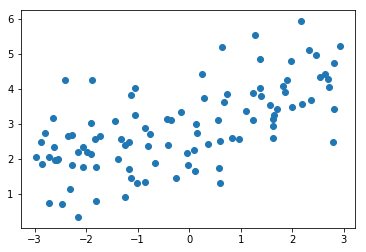

In [11]:
# 绘制样本曲线
plt.scatter(x,y)
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [14]:
np.random.seed(666)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [16]:
def PolynomialRegression(degree):
    # Pipeline 接收一个list，list中的tuple依次表示操作步骤,自动识别参数
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())])

from sklearn.metrics import mean_squared_error

# 多项式回归对样本进行训练，使用20个维度
poly20_reg = PolynomialRegression(20)
poly20_reg.fit(X_train,y_train)

y20_predict = poly20_reg.predict(X_test)
mean_squared_error(y_test,y20_predict)

167.9401086153827

In [17]:
# 167 显然是过拟合了

In [19]:
# 定义绘图模型
def plot_module(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,6])

#### 使用岭回归

In [21]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("Poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        # 设置超参α
        ("redge_reg", Ridge(alpha=alpha))
    ])

In [24]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)
# 比之前的169好太多

1.323349275401219

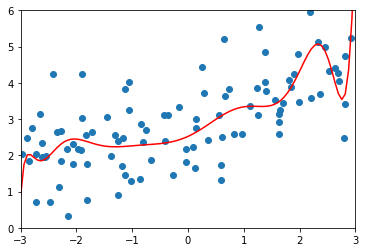

In [25]:
plot_module(ridge1_reg)

In [27]:
# 调整alpha
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)
y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)
# 比之前的169好太多

1.1888759304218457

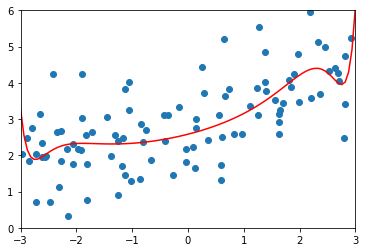

In [28]:
plot_module(ridge2_reg)

In [30]:
# 调整alpha
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,y3_predict)
# 比1又差了点，可能是惩罚的有点过了

1.3196456113086197

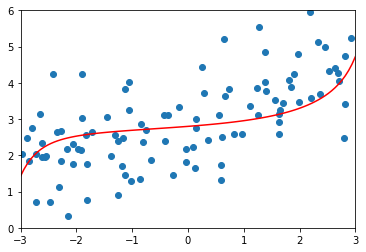

In [31]:
plot_module(ridge3_reg)

# 当alpha取非常大，我们的模型实际上相当于就是在优化θ的平方和这一项，使得其最小（因为MSE的部分相对非常小）
# 而使得θ的平方和最小，就是使得每一个θ都趋近于0，这个时候曲线就趋近于一根直线了

#### LASSO回归

<img src = "./图片/LASSO回归.png">

In [32]:
from sklearn.linear_model import Lasso

In [33]:
def LassoRegression(degree, alpha):
    return Pipeline([
        ("Poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        # 设置超参α
        ("redge_reg", Lasso(alpha=alpha))
    ])

In [36]:
# 这里穿的alpha起始值比岭回归的时候大了很多，是由于现在是绝对值
lasso1_reg = LassoRegression(degree=20,alpha=0.01)
lasso1_reg.fit(X_train,y_train)
lasso1_predict = lasso1_reg.predict(X_test)
mean_squared_error(lasso1_predict,y_test)

1.1496080843259966

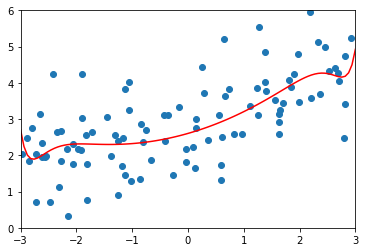

In [37]:
plot_module(lasso1_reg)

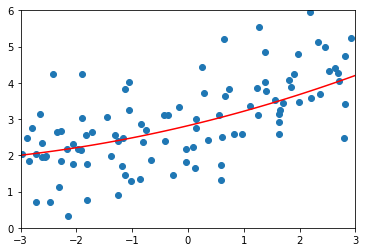

In [38]:
# 调整alpha
lasso2_reg = LassoRegression(degree=20,alpha=0.1)
lasso2_reg.fit(X_train,y_train)
lasso2_predict = lasso2_reg.predict(X_test)
mean_squared_error(lasso2_predict,y_test)
plot_module(lasso2_reg)

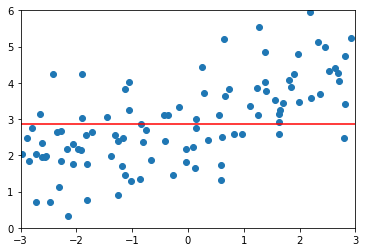

In [39]:
# 当alpha = 1时几乎已经是平的直线
lasso3_reg = LassoRegression(degree=20,alpha=1)
lasso3_reg.fit(X_train,y_train)
lasso3_predict = lasso3_reg.predict(X_test)
mean_squared_error(lasso3_predict,y_test)
plot_module(lasso3_reg)

In [44]:
# α=100的时候，使用Ridge的得到的模型曲线依旧是一根曲线，事实上，使用Ridge很难得到一根倾斜的直线，他一直是弯曲的形状

# 但是使用LASSO的时候，当α=0.1，虽然得到的依然是一根曲线，但是他显然比Radge的程度更低，更像一根直线

# 这是因为LASSO趋向于使得一部分theta值为0（而不是很小的值），所以可以作为特征选择用，
# LASSO的最后两个字母SO就是Selection Operator的首字母缩写
# 使用LASSO的过程如果某一项θ等于0了，就说明LASSO Regression认为这个θ对应的特征是没有用的，
# 剩下的那些不等于0的θ就说明LASSO Regression认为对应的这些特征有用，所以他可以当做特征选择用

In [45]:
# 解释为啥LASSO能做特征选择

<img src = "./图片/岭回归的梯度.png">

In [46]:
# 当使用Ridge的时候，当α趋近与无穷大，那么使用梯度下降法的J(θ)的导数如下图，J(θ)向0趋近的过程中，每个θ都是有值

<img src = "./图片/LASSO偏导.png">

In [47]:
# 但是LASSO不同,在LASSO的损失函数中，如果我们让α趋近于无穷，只看后面一部分的话，
# 那么后面一部分的绝对值实际上是不可导的，我们可以使用一种sign函数刻画一下绝对值导数，
# 如上图。那么这个时候，同样在J(θ)向0趋近的过程中，
# 他会先走到θ等于0的y轴位置，然后再沿着y轴往下向零点的方向走

In [48]:
# 这也说明了Ridge为什么叫岭回归，因为他更像是翻山越岭一样，在梯度下降法中一点一点找坡度缓的方向前进。
# 而LASSO的路径就比较规则，会在训练的过程中碰到一些轴使得某些θ为0。

In [49]:
# 所以从计算准确度上来说，我们应该更加倾向于Ridge，但是如果我们的维度比较多，样本非常大（比如多项式回归时degree=100）

In [50]:
# Ridge和LASSO都是在损失函数中添加一项，来调节θ的值使其尽可能的小，使得我们的模型泛化能力更好一些

<img src= "./图片/比较ridge和lasso.png">

In [51]:
# 在机器学习领域中，我们会发明不同的名词来描述不同的标准，比如用Ridge和LASSO来衡量正则化的这一项；
# MSE和MAE用来衡量回归结果的好坏，欧拉距离和曼哈顿距离用来衡量两点之间的距离。
# 但是他们背后的数学思想是非常的类似的，表达出的数学含义也是一致的。只不过应用到不同的场景中产生了不同的效果

<img src = "./图片/明科夫斯基距离.png">

In [52]:
# 明可夫斯基距离通常称为Lp范数。
# 当P=1的时候就是L1范数（曼哈顿距离|Ridge Regression）
# 当P=2的时候就是 L2范数（欧拉距离|LASSO Regression） 

<img src = "./图片/正则项.png">

In [53]:
# L2正则项本来应该有个开根号，但是这里不加这个根号是公式更简单，有时也称L2范数。

In [54]:
# 注：有了L1,L2正则项，我们就可以进一步得到LN正则项，虽然实际应用中我们的n不会超过2，但是在数学推导中是有意义的

#### 弹性网

<img src = "./图片/弹性网.png">

In [55]:
# 弹性网其实就是Ridge和LASSO的结合。

# 实际应用中，通常应该先尝试一下岭回归（如果计算能力足够的话）。
# 但是如果θ数量太大的话，消耗计算资源可能非常大，而LASSO由于有的时候急于把一些θ化为0，可能会导致得到的偏差比价大。
# 这个时候需要使用弹性网

# 回忆小批量梯度下降法也是将随机梯度下降法和批量梯度下降法结合到了一起。
# 在机器学习领域中，经常使用这种方式来创造出一些新的方法，这些方法虽然名词非常的酷，但是他们背后的意义是非常简单的

In [56]:
# 模型泛化的一个举例。我们在考试前会做很多练习题。
# 我们做练习题不是为了把全部的练习题（训练数据集）都得到满分，而是为了在最后的那一场考试（真实数据）中得到满分